<a href="https://colab.research.google.com/github/tago893/Algoproject-TSP/blob/main/04_validation/DE_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('Hwy26Crashes2019_S23.csv')

In [19]:
crash_df = df[df['Record Type'] == 1]
vehicle_df = df[df['Record Type'] == 2]
participant_df = df[df['Record Type'] == 3]

crash_df.to_csv('crash_data.csv', index = False, header=True)
vehicle_df.to_csv('vehicle_data.csv', index = False, header=True)
participant_df.to_csv('participant_data.csv', index=False, header=True)

In [20]:
# Existence assertions
# Load vehicle data and crash data
vehicle_data = pd.read_csv('vehicle_data.csv')
crash_data = pd.read_csv('crash_data.csv')

vehicle_crash_ids = vehicle_data['Crash ID'].unique()
crash_ids = crash_data['Crash ID'].unique()

# Check if all vehicle crash IDs are found in the crash IDs
unmatched_ids = set(vehicle_crash_ids) - set(crash_ids)
assert len(unmatched_ids) == 0, "There are vehicle records without a matching Crash ID"

print("All vehicle records have a matching Crash ID in the crash data.")


All vehicle records have a matching Crash ID in the crash data.


In [21]:
# Limit assertion
# Checking whether crash ID is of length 8
print(len(df))
df = df[df['Crash ID'].astype(str).str.len() == 7 ]
print(len(df))

2739
2739


In [22]:
# Intra record assertion
# If the weather is clear, the road surface should not be icy or snowy.
incompatible_weather_road = crash_data[
    (crash_data['Weather Condition'] == 'Clear') & (crash_data['Road Surface Condition'].isin(['Icy', 'Snowy']))
]
if not incompatible_weather_road.empty:
    print("There are records with incompatible weather and road surface conditions.")
    print(incompatible_weather_road)
else:
    print("All records have compatible weather and road surface conditions.")


All records have compatible weather and road surface conditions.


In [23]:
# Inter-Record Assertion
# Every vehicle listed in the crash data was part of a known crash
unknown_crashes = set(vehicle_data['Crash ID']) - set(crash_data['Crash ID'])
if unknown_crashes:
    print(f"There are vehicles listed with crash IDs that do not match any known crash: {unknown_crashes}")
else:
    print("All vehicles are part of a known crash.")
# Vehicles which are involved in a crash but not with an object at the time of the crash
crash_data_list = []
vehicle_data_list = []
# Read data into lists using filtered DataFrames
for row in crash_df.to_dict(orient='records'):
    crash_data_list.append(row)

for row in vehicle_df.to_dict(orient='records'):
    vehicle_data_list.append(row)
crash_vehicle_ids = set([row['Vehicle ID'] for row in vehicle_data_list])

for vehicle_id in crash_vehicle_ids:
    has_collision = any([row["Crash Type"] == "8" for row in crash_data_list if row["Crash ID"] == vehicle_id])

    if vehicle_id in crash_vehicle_ids and not has_collision:
        print(f"Vehicle {vehicle_id} was involved in a crash but had no collision with an object.")

All vehicles are part of a known crash.
Vehicle 3483652.0 was involved in a crash but had no collision with an object.
Vehicle 3483653.0 was involved in a crash but had no collision with an object.
Vehicle 3479559.0 was involved in a crash but had no collision with an object.
Vehicle 3479560.0 was involved in a crash but had no collision with an object.
Vehicle 3461130.0 was involved in a crash but had no collision with an object.
Vehicle 3461131.0 was involved in a crash but had no collision with an object.
Vehicle 3465226.0 was involved in a crash but had no collision with an object.
Vehicle 3465227.0 was involved in a crash but had no collision with an object.
Vehicle 3489808.0 was involved in a crash but had no collision with an object.
Vehicle 3489809.0 was involved in a crash but had no collision with an object.
Vehicle 3479570.0 was involved in a crash but had no collision with an object.
Vehicle 3479571.0 was involved in a crash but had no collision with an object.
Vehicle 3479

In [60]:
# Inter record Assertion
# For each Crash ID, there will be at least two different types of records associated with it.

record_dict = {}
for index, row in df.iterrows():
    crash_id = row['Crash ID']
    str_crash_id = str(crash_id)
    record_type = row['Record Type']
    if str_crash_id not in record_dict:
        record_dict[str_crash_id] = []
    if record_type == 1:
        key = '%s-%s' % (crash_id, record_type)
        if key not in record_dict[str_crash_id]:
            record_dict[str_crash_id].append(key)
        else:
            print("duplicated key ", key)
    elif record_type == 2:
        vehicle_id = row['Vehicle ID']
        key = '%s-%s' % (crash_id, vehicle_id)
        if key not in record_dict[str_crash_id]:
            record_dict[str_crash_id].append(key)
        else:
            print("duplicated key ", key)
    elif record_type == 3:
        participant_id = row['Participant ID']
        key = '%s-%s' % (crash_id, participant_id)
        if key not in record_dict[str_crash_id]:
            record_dict[str_crash_id].append(key)
        else:
            print("duplicated key ", key)



In [25]:
# Summary Assertion
# Crashes at intersections and on straight roadways constitute the majority of incidents suggesting these common road configurations are critical areas for traffic safety.

intersection_crashes = df[df['Road Character'] == 1]
straight_roadway_crashes = df[df['Road Character'] == 3]

total_targeted_crashes = len(intersection_crashes) + len(straight_roadway_crashes)

total_crashes = len(df)

percentage_targeted_crashes = (total_targeted_crashes / total_crashes) * 100

# Output results
print(f"Percentage of crashes at intersections and straight roadways: {percentage_targeted_crashes:.2f}%")

# Assertion output
if percentage_targeted_crashes > 50:
    print("Crashes at intersections and on straight roadways constitute the majority of incidents.")
else:
    print("Crashes at intersections and on straight roadways do not constitute the majority of incidents.")



Percentage of crashes at intersections and straight roadways: 9.49%
Crashes at intersections and on straight roadways do not constitute the majority of incidents.


In [51]:
# Summary assertion
# CrashId is unique across all the records
crash_id = set()
print(len(df))
for index, row in df.iterrows():
    if row['Record Type'] == 1:
        if row['Crash ID'] in crash_id:
            print("Crash ID is repeated ", index, row['Crash ID'])
            df.drop(index, inplace=True)
        else:
            crash_id.add(row['Crash ID'])
print(len(df))


504
504


In [52]:
# Summary assertion
# There were thousands of crashes but not millions
if(len(crash_df['Crash ID']) < 1000000):
    print("There are thousands of crashes not millions");
else:
    print("There are millions of crashes");

There are thousands of crashes not millions


<Axes: xlabel='Crash Hour', ylabel='Crash Day'>

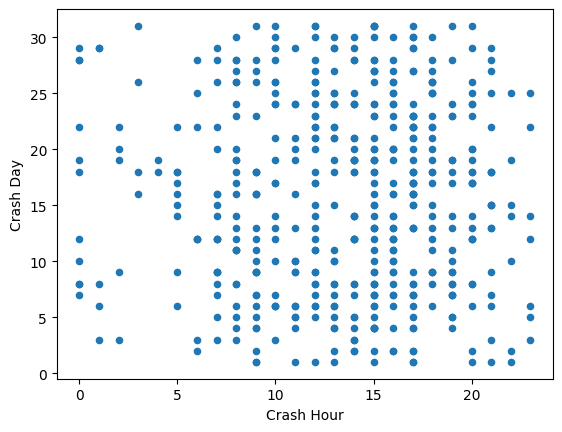

In [26]:
# Statistical Assertion
# Crashes are more during the middle of the day (office hours)
df = df[df['Crash Hour'] <= 24]
df.plot.scatter(x='Crash Hour', y='Crash Day')

In [27]:
# Statistical Assertion
# For a majority of accidents, most injuries usually fall under the minor injury category.

injury_columns = ['Total Suspected Serious Injury (A) Count',
                     'Total Suspected Minor Injury (B) Count',
                     'Total Possible Injury (C) Count']

total_injuries = crash_df[injury_columns].sum(axis=1)

injury_percentages = df[injury_columns].divide(total_injuries, axis=0).mul(100).round(2)

min_injury_percentage = injury_percentages.iloc[:, 1].mean()

if min_injury_percentage > injury_percentages.iloc[:, [0, 2]].mean(axis=1).mean():
  print("The injuries for majority of accidents does fall under minor injury. ")
else:
  print("The injuries for majority of accidents doesn't fall under minor injury.")

The injuries for majority of accidents does fall under minor injury. 


In [32]:
# Statistical assertion
# Calculate the percentage of participants with non-valid licenses
non_valid_license_count = participant_df['Driver License Status'].isin(['3', '4', '8']).sum()
total_participants = len(participant_df)
percentage_non_valid = (non_valid_license_count / total_participants) * 100

print(f"Percentage of participants with non-valid licenses: {percentage_non_valid:.2f}%")

if percentage_non_valid < 5:
    print("Less than 5% of participants have non-valid driving licenses.")
else:
    print("More than 5% of participants have non-valid driving licenses.")

Percentage of participants with non-valid licenses: 0.00%
Less than 5% of participants have non-valid driving licenses, confirming the assertion.
